In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MehrnazFarahmand/My-Repo/main/avocado.csv')

In [46]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [47]:
data.shape

(18249, 14)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [49]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [50]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [3]:
data['Date'] = pd.to_datetime(data['Date'], format ='%Y-%m-%d')
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [4]:
data.drop(['Unnamed: 0','Date'], axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
data['region'] = le.fit_transform(data['region'])
data['type'] = le.fit_transform(data['type'])

In [64]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000,31.000000


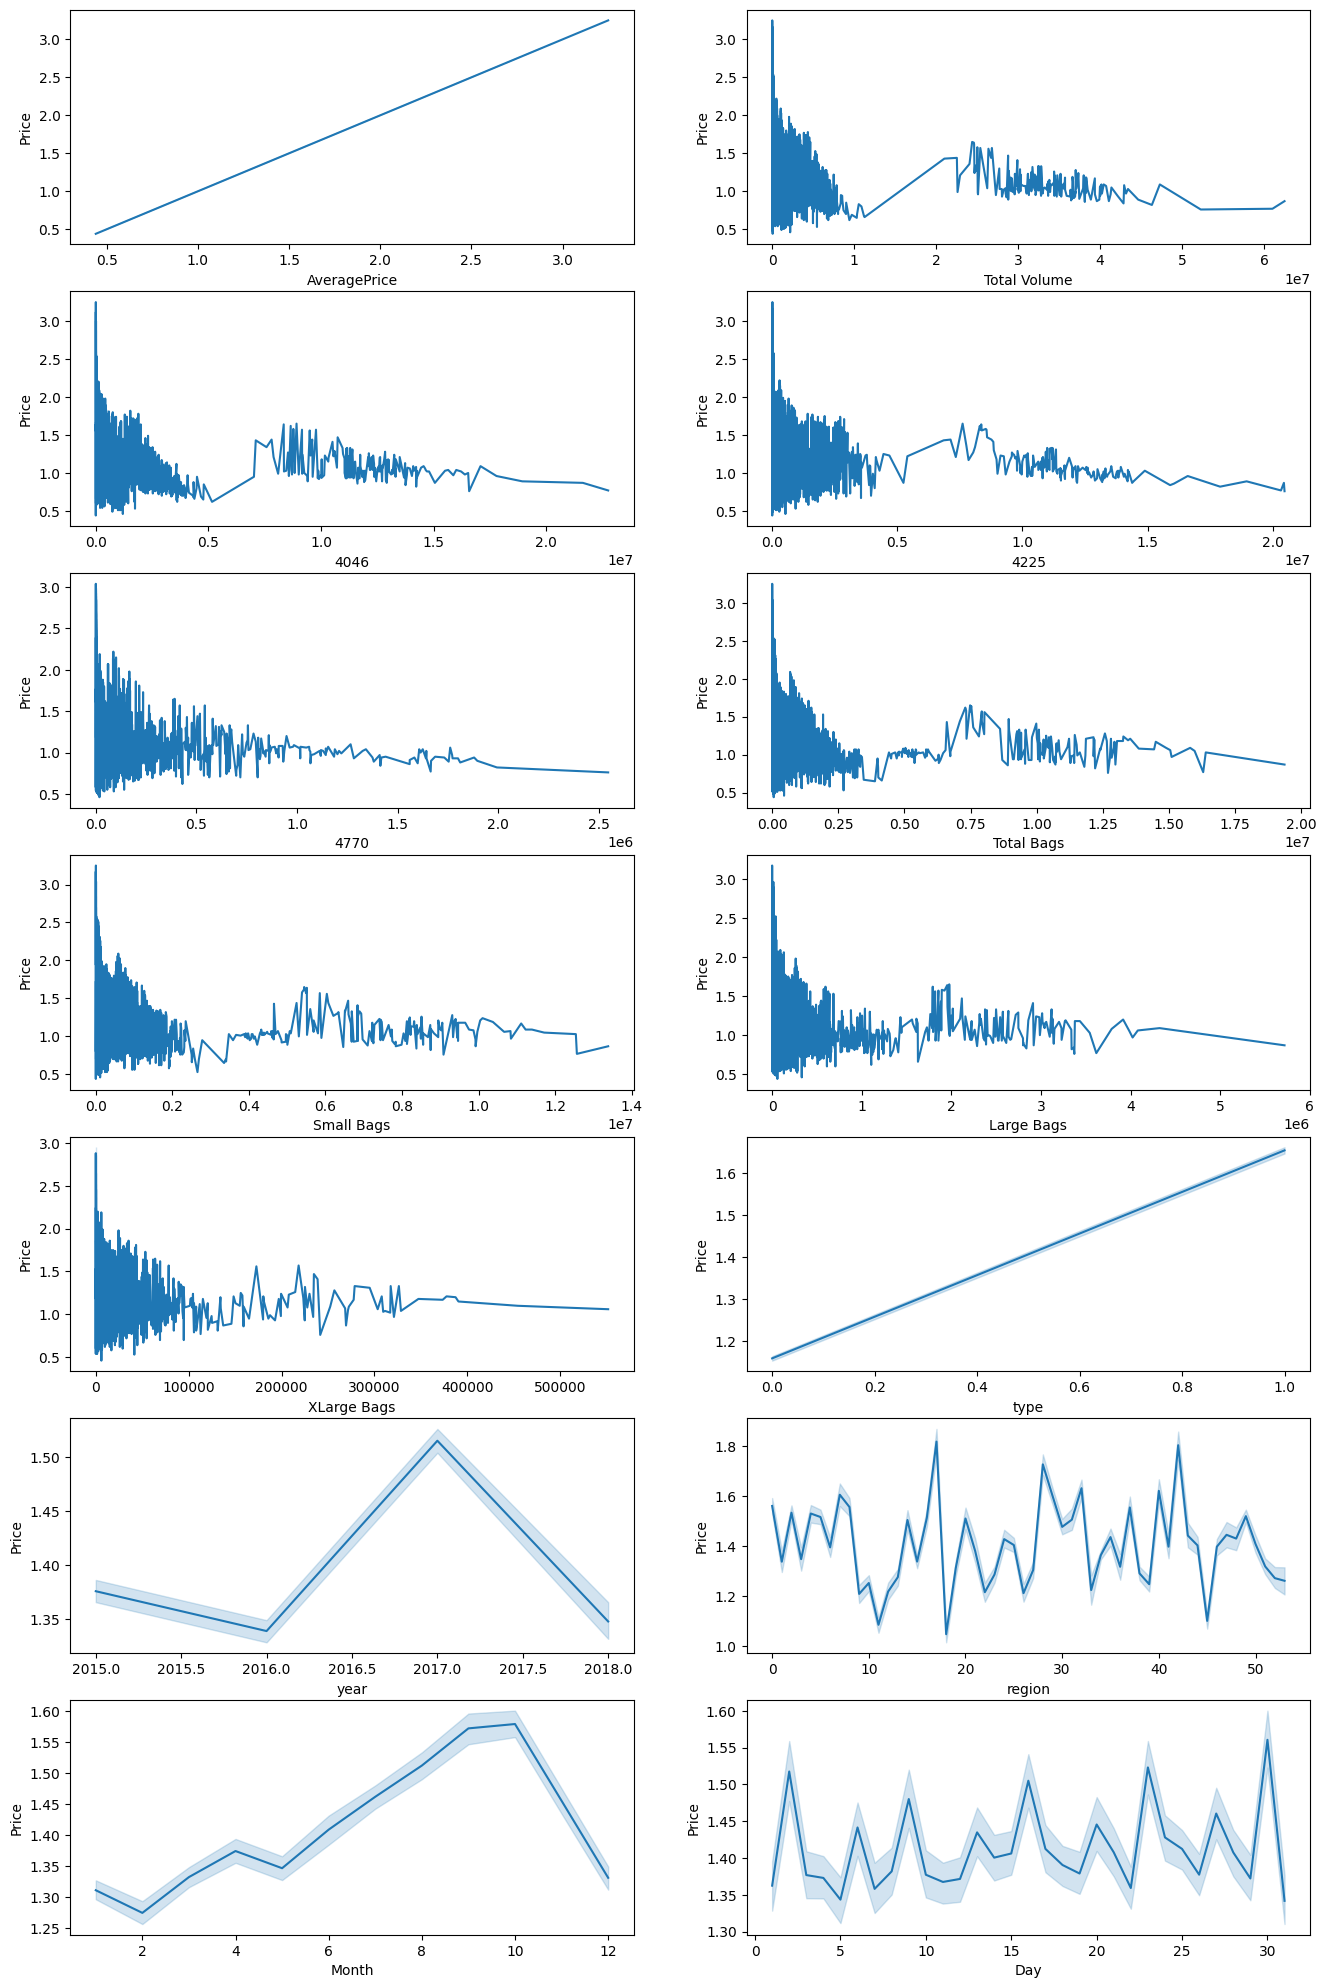

In [72]:
plt.figure(figsize = (16,25))
plotnumber = 1
for col in data.columns:
    if plotnumber<=14:
        ax = plt.subplot(7,2,plotnumber)
        sns.lineplot(x = col , y = 'AveragePrice' , data=data)
        plt.xlabel(col)
        plt.ylabel('Price')
        plotnumber +=1

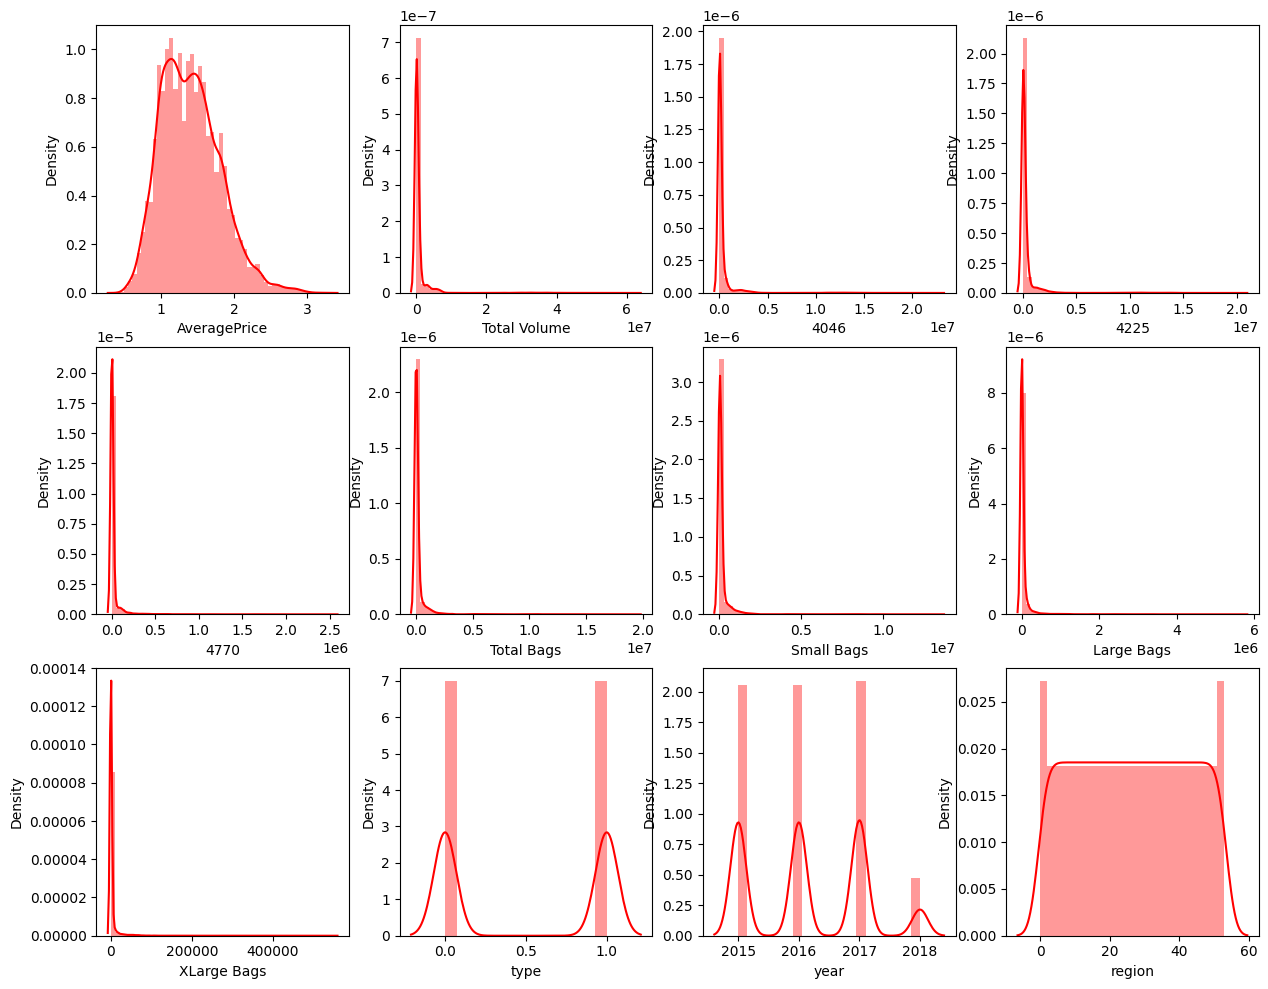

In [38]:
plt.figure(figsize = (15,16))
plotnumber = 1
for col in data.columns:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

In [39]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

<Axes: >

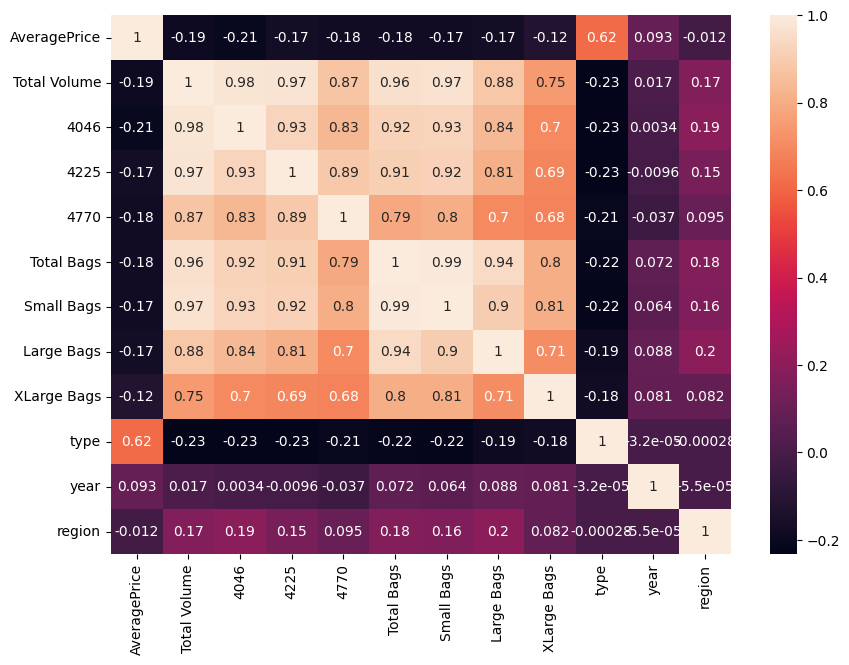

In [44]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot=True)

### Observations so far:


*   Avocados in 2017 had highest price but then prices came down again
*   Prices go up towards winter months
*  the strongest relation is with the type of the avocado
* bags and sizes don't really have much correlation with the target but a lot with each other so we might have to lose some of them because of multivolinearity
* there are many zero values causing skewness in these columns but we can't remove them as we will lose a lot of data



it's best to shuffle the data as it seems to be ordered alphabetically

In [7]:
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
x = data.drop('AveragePrice', axis=1)
y = data['AveragePrice']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,4.926465e+09,Total Volume
1,6.609602e+08,4046
2,5.988844e+08,4225
3,4.770265e+06,4770
4,2.370316e+14,Total Bags
5,1.364727e+14,Small Bags
6,1.450435e+13,Large Bags
7,7.622368e+10,XLarge Bags
8,1.061752e+00,type
9,1.084444e+00,year


In [13]:
x_scaled.drop(['Total Bags','Total Volume'], axis=1, inplace=True)

In [126]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,10.113447,4046
1,13.362559,4225
2,5.386276,4770
3,19.494411,Small Bags
4,5.609298,Large Bags
5,3.414851,XLarge Bags
6,1.059869,type
7,1.081796,year
8,1.069330,region
9,1.036670,Month


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN

In [15]:
MaxAccu = 0
MaxRS = 0
for i in range(1,400):
  x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = r2_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Score:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Score: 0.46079919220958 
 Best Random State: 58


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=MaxRS)

**Linear Regression**

In [17]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
LR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,LRpred))
print('R2_score for training data:', r2_score(y_train,LR_trainpred))
print('MAE:', mean_absolute_error(y_test, LRpred))
print('MSE:', mean_squared_error(y_test, LRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, LRpred)))

R2_score: 0.46079919220958
R2_score for training data: 0.4295948108760381
MAE: 0.22727197604552601
MSE: 0.0868495641689114
RMSE: 0.47673050672840944


**Random Forest**

In [18]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFRpred = RFR.predict(x_test)
RFR_trainpred = RFR.predict(x_train)
print('R2_score:', r2_score(y_test,RFRpred))
print('R2_score for training data:', r2_score(y_train,RFR_trainpred))
print('MAE:', mean_absolute_error(y_test, RFRpred))
print('MSE:', mean_squared_error(y_test, RFRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, RFRpred)))

R2_score: 0.8900708692676611
R2_score for training data: 0.9829317864990341
MAE: 0.09489095890410959
MSE: 0.017706384997260273
RMSE: 0.3080437613458672


**KNN**

In [19]:
knn = KNN()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
knn_trainpred = knn.predict(x_train)
print('R2_score:', r2_score(y_test,knnpred))
print('R2_score for training data:', r2_score(y_train,knn_trainpred))
print('MAE:', mean_absolute_error(y_test, knnpred))
print('MSE:', mean_squared_error(y_test, knnpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, knnpred)))

R2_score: 0.5292324844083012
R2_score for training data: 0.6762117705350171
MAE: 0.19867835616438353
MSE: 0.07582695159817351
RMSE: 0.44573350352467733


**Gradient Boosting**

In [20]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBRpred = GBR.predict(x_test)
GBR_trainpred = GBR.predict(x_train)
print('R2_score:', r2_score(y_test,GBRpred))
print('R2_score for training data:', r2_score(y_train,GBR_trainpred))
print('MAE:', mean_absolute_error(y_test, GBRpred))
print('MSE:', mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, GBRpred)))

R2_score: 0.7588547843996987
R2_score for training data: 0.7582435712061695
MAE: 0.14977494571293648
MSE: 0.03884147904400903
RMSE: 0.3870076817234207


**Decision Tree**

In [21]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
DTpred = DT.predict(x_test)
DT_trainpred = DT.predict(x_train)
print('R2_score:', r2_score(y_test,DTpred))
print('R2_score for training data:', r2_score(y_train,DT_trainpred))
print('MAE:', mean_absolute_error(y_test, DTpred))
print('MSE:', mean_squared_error(y_test, DTpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, DTpred)))

R2_score: 0.7455431937949115
R2_score for training data: 1.0
MAE: 0.13080730593607307
MSE: 0.040985589041095886
RMSE: 0.3616729267391645


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
score = cross_val_score(LR, x_scaled, y)
print(score)
print(score.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,LRpred)-score.mean())

[0.45234263 0.4383486  0.43257117 0.42013139 0.44653792]
0.43798634149191873
Difference Between score mean and R2score: 0.02281285071766126


In [24]:
score1 = cross_val_score(RFR, x_scaled, y)
print(score1)
print(score1.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,RFRpred)-score1.mean())

[0.88781806 0.89565447 0.88414197 0.88742312 0.89000431]
0.8890083854372948
Difference Between score mean and R2score: 0.0010624838303663342


In [25]:
score2 = cross_val_score(knn, x_scaled, y)
print(score2)
print(score2.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,knnpred)-score2.mean())

[0.53555496 0.51873795 0.52409649 0.51871636 0.52106154]
0.5236334594068865
Difference Between score mean and R2score: 0.005599025001414626


In [26]:
score3 = cross_val_score(GBR, x_scaled, y)
print(score3)
print(score3.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,GBRpred)-score3.mean())

[0.74554098 0.73612896 0.74044778 0.74768974 0.74556779]
0.7430750506479246
Difference Between score mean and R2score: 0.015779733751774105


In [27]:
score4 = cross_val_score(DT, x_scaled, y)
print(score4)
print(score4.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,DTpred)-score4.mean())

[0.73630787 0.75255524 0.7835676  0.75983562 0.77728852]
0.7619109682458335
Difference Between score mean and R2score: -0.016367774450921968


Random Forest seem to be the best model

Text(0.5, 1.0, 'RandomForest')

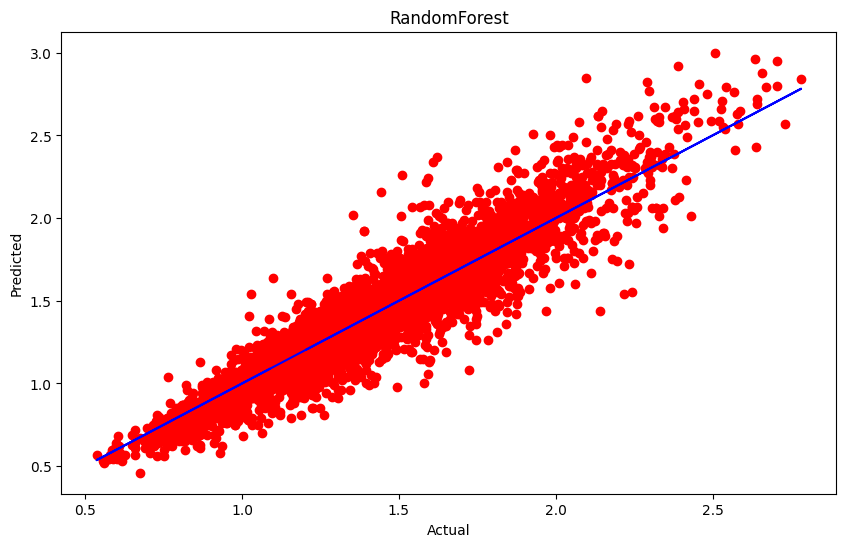

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x=RFRpred,y=y_test,color='r')
plt.plot(RFRpred,RFRpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest')

In [29]:
from sklearn.model_selection import GridSearchCV

In [32]:
param = {'criterion':['squared_error', 'friedman_mse'],'n_estimators':[50,100,200],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10,100], 'max_leaf_nodes': [2, 5, 10, 100]}
gscv = GridSearchCV(RandomForestRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [1, 3, 10, 100],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'max_leaf_nodes': [2, 5, 10, 100],
                         'n_estimators': [50, 100, 200]})

In [33]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'n_estimators': 100}

In [34]:
model = RandomForestRegressor(criterion= 'squared_error', max_depth= 100, max_features='sqrt', max_leaf_nodes= 100, n_estimators= 100)

In [35]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, pred)))

R2_score: 0.7371622351229337
MAE: 0.1595991285083614
MSE: 0.04233551767151042
RMSE: 0.39949859637846213


In [36]:
import joblib

In [37]:
joblib.dump(model,'avocado_price.pk1')

['avocado_price.pk1']

In [39]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred
df

,Actual,Prediction
0,1.29,1.225256
1,1.52,1.719427
2,0.98,1.088823
3,0.74,0.917588
4,1.78,1.492887
...,...,...
5470,1.55,1.691826
5471,1.55,1.336474
5472,1.80,1.489569
5473,1.04,1.065184


# Predicting the Region

we already know region didn't have high correlation with any of the other columns
but some regions had higher prices and certain type of avocado

<Axes: xlabel='region', ylabel='AveragePrice'>

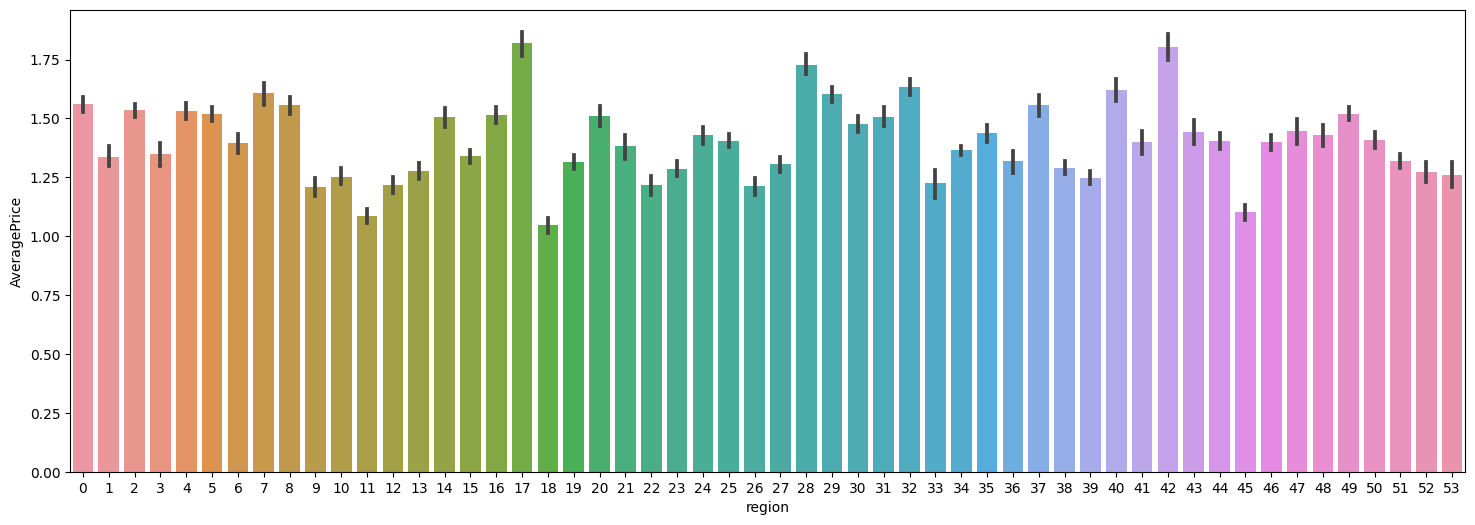

In [44]:
plt.figure(figsize=(18,6))
sns.barplot(x = data['region'], y=data['AveragePrice'])

In [57]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


In [45]:
x1 = data.drop('region', axis=1)
y1 = data['region']

In [46]:
x1_scaled = pd.DataFrame(scaler.fit_transform(x1), columns= x1.columns)

In [47]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x1_scaled.values,i) for i in range(len(x1_scaled.columns))]
vif['Features'] = x1_scaled.columns
vif

,VIF,Features
0,1.782403e+00,AveragePrice
1,4.926931e+09,Total Volume
2,6.610227e+08,4046
3,5.989414e+08,4225
4,4.770701e+06,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.622303e+10,XLarge Bags
9,1.718347e+00,type


In [48]:
x1_scaled.drop(['Total Bags','Total Volume'], axis=1, inplace=True)

In [49]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x1_scaled.values,i) for i in range(len(x1_scaled.columns))]
vif['Features'] = x1_scaled.columns
vif

,VIF,Features
0,1.781974,AveragePrice
1,10.088694,4046
2,13.542451,4225
3,5.382339,4770
4,19.477211,Small Bags
5,5.569363,Large Bags
6,3.415046,XLarge Bags
7,1.715234,type
8,1.110632,year
9,1.095125,Month


we also drop the columns with very low correlation

In [58]:
x1_scaled.drop(['Day','Month','year'], axis=1, inplace=True)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x1_scaled,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.331324200913242 
 Best Random State: 190


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest Classifier**

In [62]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.9042922374429224
[[100   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   0]
 [  0   0 107 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   1 109   0]
 [  0   0   3 ...   0   0  82]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       105
           1       0.83      0.89      0.86        97
           2       0.96      0.95      0.95       113
           3       0.87      0.85      0.86        98
           4       0.93      0.96      0.95       110
           5       0.93      0.79      0.86        97
           6       0.97      0.98      0.98       101
           7       0.91      0.91      0.91       106
           8       0.94      0.98      0.96       105
           9       0.85      0.85      0.85       117
          10       0.85      0.88      0.87       107
          11       0.94      0.95      0.94        99
          12       0.95      0.97      0.96       100
          13       0.79      0.7

**Gardient Boosting**

In [64]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.8429223744292238
[[ 92   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   2]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ... 104   1   0]
 [  0   0   0 ...   0 107   0]
 [  0   0   1 ...   0   0  77]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       105
           1       0.76      0.82      0.79        97
           2       0.96      0.88      0.92       113
           3       0.80      0.77      0.78        98
           4       0.88      0.95      0.91       110
           5       0.77      0.77      0.77        97
           6       0.97      0.95      0.96       101
           7       0.87      0.81      0.84       106
           8       0.94      0.94      0.94       105
           9       0.84      0.80      0.82       117
          10       0.74      0.79      0.76       107
          11       0.90      0.89      0.89        99
          12       0.90      0.90      0.90       100
          13       0.78      0.7

**Bagging**

In [65]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.8549771689497717
[[ 91   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   1   0 ...   0 103   0]
 [  0   1   2 ...   0   0  73]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.72      0.81      0.76        97
           2       0.88      0.94      0.91       113
           3       0.78      0.82      0.80        98
           4       0.91      0.95      0.93       110
           5       0.84      0.78      0.81        97
           6       0.89      0.97      0.93       101
           7       0.85      0.87      0.86       106
           8       0.92      0.97      0.94       105
           9       0.81      0.83      0.82       117
          10       0.79      0.87      0.83       107
          11       0.91      0.90      0.90        99
          12       0.94      0.96      0.95       100
          13       0.75      0.8

**Cross Validation**

In [66]:
score = cross_val_score(RFC, x1_scaled,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.89616438 0.8969863  0.8909589  0.90027397 0.90956426]
0.8987895651651605
Difference Between score mean and accuracy score: 0.005502672277761911


In [67]:
score1 = cross_val_score(GBC, x1_scaled,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score1.mean())

[0.74554098 0.73612896 0.74044778 0.74768974 0.74556779]
0.7430750506479246
Difference Between score mean and accuracy score: 0.01953434918680419


In [68]:
score2 = cross_val_score(BC, x1_scaled,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score2.mean())

[0.73630787 0.75255524 0.7835676  0.75983562 0.77728852]
0.7619109682458335
Difference Between score mean and accuracy score: 0.005560289864865786


Random forest is the best model

In [ ]:
from sklearn.model_selection import GridSearchCV

**Tuning Parameters**

In [70]:
param = {'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10,100]}
gscv = GridSearchCV(RFC,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 10, 100],
                         'max_features': ['sqrt', 'log2', 'None']})

In [71]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2'}

In [74]:
model2 = RandomForestClassifier(criterion= 'gini', max_depth= 100, max_features= 'log2')
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

0.9059360730593607
[[ 98   0   0 ...   0   0   0]
 [  0  85   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 109   0]
 [  0   0   3 ...   0   0  84]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       105
           1       0.86      0.88      0.87        97
           2       0.96      0.92      0.94       113
           3       0.90      0.83      0.86        98
           4       0.94      0.98      0.96       110
           5       0.96      0.80      0.88        97
           6       0.97      0.98      0.98       101
           7       0.88      0.92      0.90       106
           8       0.95      0.99      0.97       105
           9       0.88      0.85      0.86       117
          10       0.85      0.90      0.87       107
          11       0.92      0.95      0.94        99
          12       0.95      0.97      0.96       100
          13       0.78      0.8

In [75]:
import joblib

In [76]:
joblib.dump(model2,'avocado_region.pk1')

['avocado_region.pk1']

In [77]:
df2 = pd.DataFrame()
actual = np.array(y_test)
df2['Actual'] = actual
df2['Prediction'] = pred2
df2

,Actual,Prediction
0,30,30
1,6,6
2,5,5
3,23,23
4,16,16
...,...,...
5470,8,8
5471,36,36
5472,2,2
5473,26,26
